<a href="https://colab.research.google.com/github/debasishghosh-lab/Clustering_Project_ML/blob/main/Debasish_Ghosh_Clustring_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("MiniProject.csv");  #Loaded The Dataset

In [4]:
df.head()


,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 73 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                               111 non-null    object
 1   Age                                                                                                                                     111 non-null    object
 2   Height
Range should be between 120 cm - 220 cm
Note(Provide the height in integer for eg-124cm ,
           don't provide like 120.64)  111 non-null    object
 3   Weight
Range should be between 30 - 150 kg                            

In [6]:
df.isnull().sum()

,0
Timestamp,0
Age,0
"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",0
Weight\nRange should be between 30 - 150 kg,0
Cuisine_top1,0
...,...
Introversion extraversion,0
Risk taking,0
Conscientiousness,0
Open to new experiences,0


In [7]:
# Cleaning the  column names
df.columns = df.columns.str.strip()            # removes leading/trailing spaces
df.columns = df.columns.str.lower()            # converts to lowercase
df.columns = df.columns.str.replace(' ', '_')  # replaces spaces with underscores
df.columns = df.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True) # removes other special chars


print(df.columns)


Index(['timestamp', 'age',
       'heightrange_should_be_between_120_cm__220_cmnoteprovide_the_height_in_integer_for_eg124cm____________dont_provide_like_12064',
       'weightrange_should_be_between_30__150_kg', 'cuisine_top1',
       'cuisine_top2', 'cuisine_top3', 'spice_tolerance', 'dietary_preference',
       'eating_out_per_week',
       'food_budget_per_meal_note_provide_integer_value_for_eg_like199',
       'sweet_tooth_level_1_is_low_and_5_is_high', 'tea_vs_coffee',
       'movie_genre_top1', 'movie_genre_top2', 'movie_genre_top3',
       'series_genre_top1', 'series_genre_top2', 'series_genre_top3',
       'content_lang_top1', 'content_lang_top2', 'content_lang_top3',
       'ott_top1', 'ott_top2', 'ott_top3', 'binge_frequency_per_week',
       'screen_time_moviesseries_in_hours_per_week__provide_value_between_040',
       'gaming_days_per_week',
       'gaming_hours_per_week__provide_values_in_integer_between_050',
       'game_genre_top1', 'game_genre_top2', 'game_genre_top

In [8]:
#I can see the teamwork_preference column name is very messy so I will change the name to work with


df = df.rename(columns={
    'teamwork_preference____like__1prefer_solo_5prefer_teams': 'teamwork_preference',
    'club_top_2':'club_top2'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 73 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   timestamp                                                                                                                     111 non-null    object
 1   age                                                                                                                           111 non-null    object
 2   heightrange_should_be_between_120_cm__220_cmnoteprovide_the_height_in_integer_for_eg124cm____________dont_provide_like_12064  111 non-null    object
 3   weightrange_should_be_between_30__150_kg                                                                                

In [9]:
#Here I will check the specific required columns only to work with it

df[['club_top1','club_top2','hobby_top1','hobby_top2','teamwork_preference']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   club_top1            111 non-null    object
 1   club_top2            111 non-null    object
 2   hobby_top1           111 non-null    object
 3   hobby_top2           111 non-null    object
 4   teamwork_preference  111 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.5+ KB


In [10]:
print(df['club_top1'].head(10))


0            Robotics Club
1              Coding Club
2              Coding Club
3    Entrepreneurship Cell
4            Literary Club
5              Coding Club
6              Sports Club
7               Music Club
8               Music Club
9               Music Club
Name: club_top1, dtype: object


In [11]:
# I will define a function to clean the data for the required columns

def clean(data):
  if pd.isnull(data):
    return None
  return str(data).strip().lower()

for col in ['club_top1','club_top2','hobby_top1','hobby_top2']:
  df[col] = df[col].apply(clean)


In [12]:
df[['club_top1','club_top2','hobby_top1','hobby_top2','teamwork_preference']]

,club_top1,club_top2,hobby_top1,hobby_top2,teamwork_preference
0,robotics club,music club,cricket,writing,3
1,coding club,sports club,coding,cricket,3
2,coding club,sports club,cricket,coding,3
3,entrepreneurship cell,sports club,cricket,music,5
4,literary club,entrepreneurship cell,badminton,debate,1
...,...,...,...,...,...
106,entrepreneurship cell,music club,gym,music,5
107,sports club,coding club,cricket,photography,4
108,entrepreneurship cell,sports club,cricket,yoga,5
109,sports club,music club,cricket,photography,3


In [13]:
def make_interests(row):
    items = [row['club_top1'], row['club_top2'], row['hobby_top1'], row['hobby_top2']]
    items = [x for x in items if x is not None]
    return list(dict.fromkeys(items))

df['interests'] = df.apply(make_interests, axis=1)


In [14]:
mlb = MultiLabelBinarizer()
interest_matrix = mlb.fit_transform(df['interests'])
interest_df = pd.DataFrame(interest_matrix, columns=mlb.classes_)


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
teamwork_scaled = scaler.fit_transform(df[['teamwork_preference']])

final_features = np.hstack([interest_matrix, teamwork_scaled])


In [16]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['cluster'] = clustering.fit_predict(final_features)


In [22]:
for k in range(2, 8):
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(final_features)
    score = silhouette_score(final_features, labels)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.086
k=3, silhouette=0.093
k=4, silhouette=0.103
k=5, silhouette=0.112
k=6, silhouette=0.094
k=7, silhouette=0.104


In [18]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['cluster'] = clustering.fit_predict(final_features)


In [19]:
for c in sorted(df['cluster'].unique()):
    group = df[df['cluster']==c]
    print(f"\nCluster {c}:")
    print(group['interests'].explode().value_counts().head(5))
    print("Avg teamwork preference:", group['teamwork_preference'].mean())



Cluster 0:
interests
sports club    27
cricket        22
coding club    14
coding          8
gym             8
Name: count, dtype: int64
Avg teamwork preference: 3.7857142857142856

Cluster 1:
interests
cultural club    16
dance            13
music club       12
painting         12
coding club       8
Name: count, dtype: int64
Avg teamwork preference: 4.045454545454546

Cluster 2:
interests
coding club              25
music                    13
robotics club            11
coding                   10
entrepreneurship cell     9
Name: count, dtype: int64
Avg teamwork preference: 3.4642857142857144

Cluster 3:
interests
music club     21
music          18
cricket         8
photography     8
sports club     7
Name: count, dtype: int64
Avg teamwork preference: 3.5454545454545454

Cluster 4:
interests
cultural club    8
writing          8
literary club    6
photography      4
gym              3
Name: count, dtype: int64
Avg teamwork preference: 3.1818181818181817


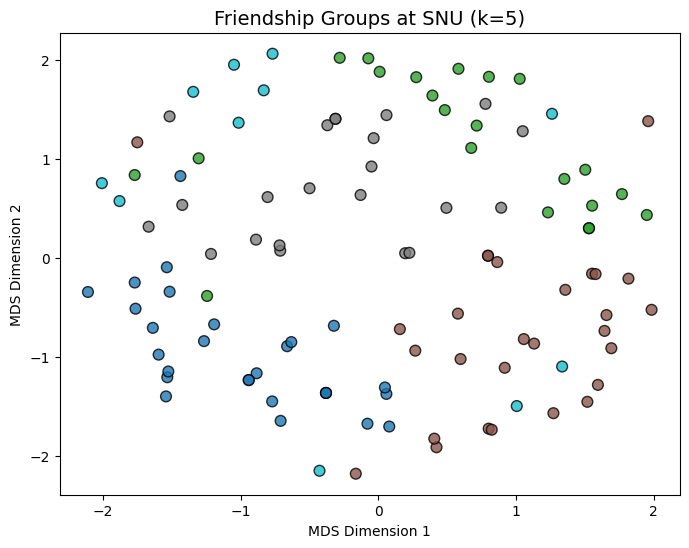

In [20]:
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
coords = mds.fit_transform(final_features)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=df['cluster'], cmap='tab10', s=60, alpha=0.8, edgecolors='k')
plt.title("Friendship Groups at SNU (k=5)", fontsize=14)
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()
